#REFERENCE
https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

Other references 
https://github.com/BinRoot/TensorFlow-Book

https://medium.com/machine-learning-for-humans/how-to-learn-machine-learning-24d53bb64aa1

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5

https://missinglink.ai/guides/neural-network-concepts/convolutional-neural-network-build-one-keras-pytorch/


In [1]:
import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig


<Figure size 640x480 with 9 Axes>

In [3]:
import keras
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)


In [4]:
# code for digit recognition
from keras.datasets import mnist#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape)

(60000,)


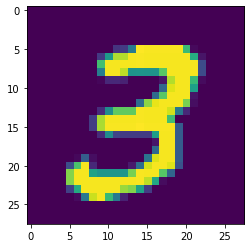

In [5]:
import matplotlib.pyplot as plt#plot the first image in the dataset
plt.imshow(X_train[7])

In [6]:
#check image shape
X_train[0].shape


(28, 28)

In [7]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]
print(y_train.shape)

(60000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()

W0709 21:04:34.256763 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [10]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

W0709 21:04:34.710562 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 21:04:34.836239 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.add(Flatten())


In [12]:
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

W0709 21:04:35.479497 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 21:04:35.531628 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

W0709 21:04:36.173562 140029347194688 deprecation.py:323] From /home/sajini/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 21:04:36.272527 140029347194688 deprecation_wrapper.py:119] From /home/sajini/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 80s 1ms/step - loss: 1.9735 - acc: 0.8489 - val_loss: 0.0910 - val_acc: 0.9719
Epoch 2/3
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0690 - acc: 0.9794 - val_loss: 0.0806 - val_acc: 0.9754
Epoch 3/3
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0471 - acc: 0.9857 - val_loss: 0.0894 - val_acc: 0.9745


In [15]:
#train the model
model.predict(X_test[:4])

array([[7.66762476e-09, 1.15175599e-12, 4.61624978e-07, 3.73994681e-07,
        2.75273693e-11, 1.63214470e-10, 6.53673907e-16, 9.99997497e-01,
        1.26236694e-06, 4.57291492e-07],
       [1.46260139e-11, 1.46058998e-09, 9.99999881e-01, 1.55342864e-10,
        1.45067053e-12, 8.14811651e-13, 8.68475567e-08, 1.07475153e-16,
        5.86060267e-09, 4.60717551e-14],
       [7.52677124e-07, 8.84423673e-01, 9.48591996e-03, 6.63505830e-07,
        5.25876246e-02, 3.19828745e-04, 2.42060178e-05, 1.82523465e-07,
        5.31561337e-02, 9.91547040e-07],
       [1.00000000e+00, 1.54761525e-13, 1.23456170e-08, 8.07566887e-15,
        3.55774898e-09, 2.76142997e-12, 6.94538611e-12, 3.33716317e-13,
        2.22646301e-09, 9.04916231e-09]], dtype=float32)

In [16]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)